<a href="https://colab.research.google.com/github/GuohongZhang20032766/ISIS2001/blob/main/Programming%20Assignment%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Write a report to uncover trends and patterns in email usage within Enron。
   * Your account will be delivered as a Python notebook
   * This includes comments, data graphs, and code

    This format will allow readers if they choose to verify your findings.
     The task was to identify the busiest email hours and top ten email senders in the organization and visualize these findings.
     You will need to include the following graphs: Number of messages per day by date.
     Who are the organization's top ten email senders.
     Notebooks as business reports Many companies use reports to reflect past data, prepare for the future, gain insight, or provide answers to questions.
     Business reports use data and shed light on potentially challenging ideas or issues.
     Business reports have a clearly defined structure with clearly marked sections and headings

In [ ]:
# import pandas
import pandas as pd

In [ ]:
# import database plugin
import sqlite3

In [ ]:
conn  = sqlite3.connect('extract.db')

# referenceinfo
    rfid: reference information ID
     mid: message ID
     reference: Contains the entire email with shortened headers.

In [ ]:
referenceinfo = pd.read_sql("select * from referenceinfo ",conn)
referenceinfo.head()

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."


## 1 As the rfid grows, will the mid also grow with it?

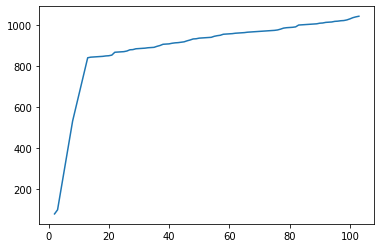

In [ ]:
import matplotlib.pyplot as plt

plt.plot(referenceinfo.rfid,referenceinfo.mid)
plt.show()

# Employeelist
    eid: employee ID
     firstName: first name
     · lastName: last name
     Email_id: Email address (primary). This one can be found in another table/dataframe, useful for matching.
     · Email2: Additional email address replaced by primary email address.
     · Email3: See above
     · Email4: See above
     folder: the user folder in the raw data dump
     · status: The last position of the employee. "None" is unknown.

In [ ]:
employeelist = pd.read_sql("select * from employeelist ",conn)
employeelist.head()

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee


# Message
    Table: Message
     mid: message ID. Refers to lines in recipient information and reference information.
     sender: email address (updated)
     date: the date.
     message_id: Internal message ID from the mail server.
     subject: email subject
     body: The body of the email. Can be truncated in the R version!
     folder: The exact folder of emails containing subfolders.

In [ ]:
message = pd.read_sql("select * from message ",conn)
message.head()

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases


## Number of messages sent per day

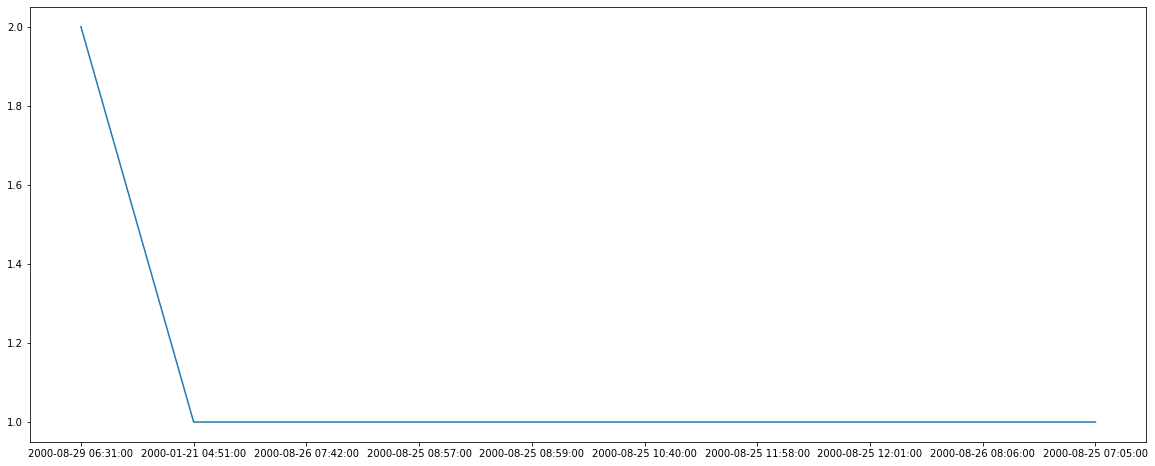

In [ ]:
date = message.groupby(["date"]).count() .sort_values('mid', ascending = False ).head(10)
plt.figure(figsize=(20,8)) 
plt.xticks(range(0,len(date.index)),date.index)

plt.plot(date.index.to_list(),date.mid.to_list()  )


## Top 10 of the total number of emails sent
 

<BarContainer object of 10 artists>

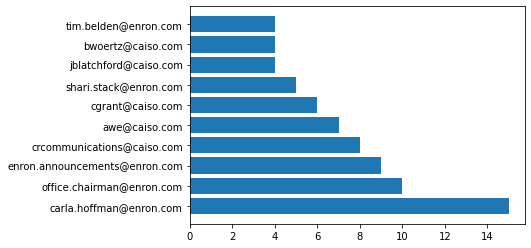

In [ ]:
sender_top10 = message.groupby(["sender"]).count() .sort_values('mid', ascending = False ).head(10)

plt.barh(sender_top10.index.to_list(),sender_top10.mid.to_list()  )

# recipientinfo
     Recipient Information Note: If sending an email to multiple recipients, there will be a new line for each recipient!
     rid: reference ID
     mid: message ID from message table/data frame
     rtype: Shows whether the recipient received the email normally ("to"), as a carbon copy ("cc") or as a blind carbon copy ("bcc").
     rvalue: the recipient's email address

In [ ]:
recipientinfo = pd.read_sql("select * from recipientinfo ",conn)
recipientinfo.head()

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
